In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0,5.0)

#  Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
# collecting X and Y
X =  data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values
X

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [6]:
# Mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#  Total number of values
n = len(X)

# to calculate the values of b1 and b0 (m and c in mx+c)

# where m = summation of ((X-mean_x) (Y-mean_y)) / summation of ((X-mean_x)**2)

numer = 0
denom = 0

for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

#  print coefficinets 

print(b0,b1)   


325.57342104944223 0.26342933948939945


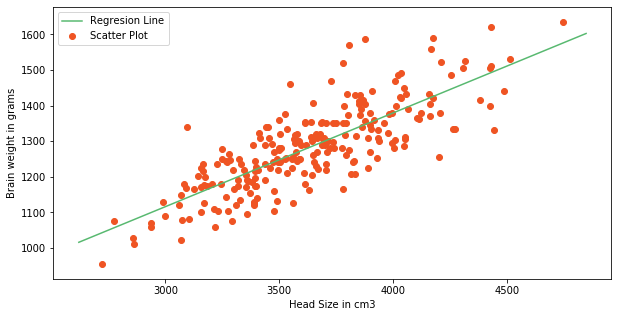

In [7]:
#  Plotting values and Regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# plotting line
plt.plot(x,y, color='#58b970', label='Regresion Line')

# Plotting Scatter Points
plt.scatter(X,Y, c='#ef5423', label = 'Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

#  R^2 Method


In [8]:
ss_t = 0
ss_r = 0

for i in range(n):
    y_pred =  b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


#  The scikit-learn approach

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# X = X.reshape((n, 1))

# creating model
reg = LinearRegression()

#  fitting training data
reg  = reg.fit(X,Y)

# Y Prediction
Y_pred = reg.predict(X)


# Calculating RMSE and R2 Score

mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)

r2_score = reg.score(X, Y)

print(rmse)
print(r2_score)

72.1206213783709
0.639311719957
